<a href="https://colab.research.google.com/github/Abdullahcys10/MachineLearning6my2/blob/main/lab3/2_Data_Visualization_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARTI308 - Machine Learning
# Seaborn Overview

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.




## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Imports

In [81]:
import seaborn as sns
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [82]:
tips = sns.load_dataset('tips')   # load sample restaurant tips dataset into a dataframe

In [83]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

/tmp/ipython-input-1093071496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

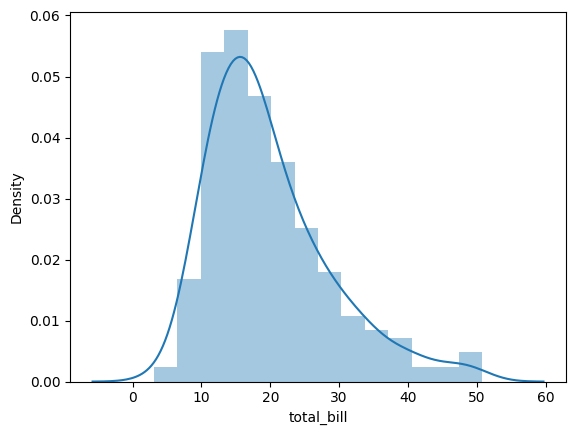

In [84]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

/tmp/ipython-input-908287737.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde=False, bins=30)   # histogram of total_bill (no KDE, 30 bins)


<Axes: xlabel='total_bill'>

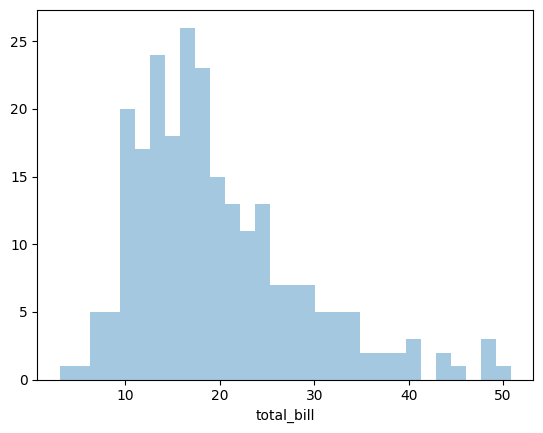

In [85]:
sns.distplot(tips['total_bill'], kde=False, bins=30)   # histogram of total_bill (no KDE, 30 bins)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with:
* “scatter”
* “reg”
* “resid”
* “kde”
* “hex”

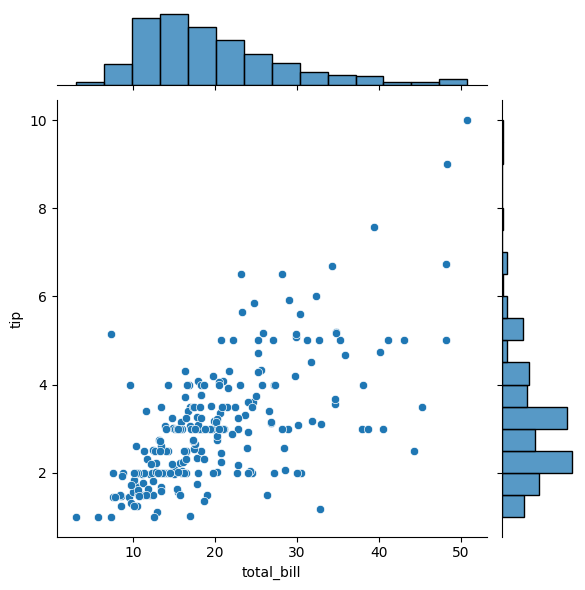

In [86]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')  # scatter plot showing relationship between total_bill and tip

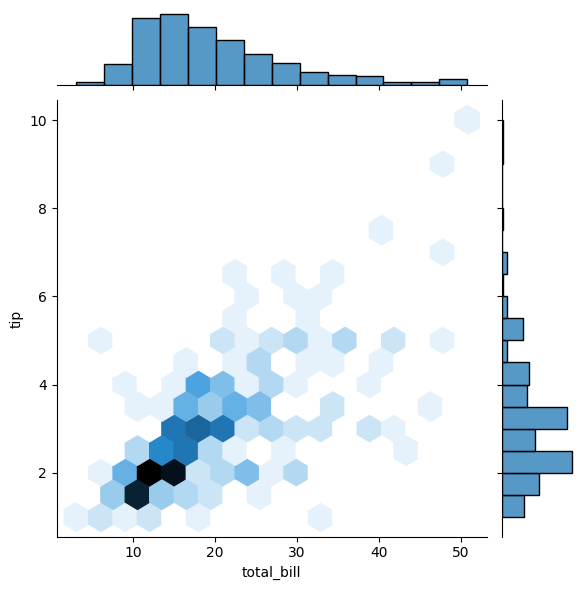

In [87]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

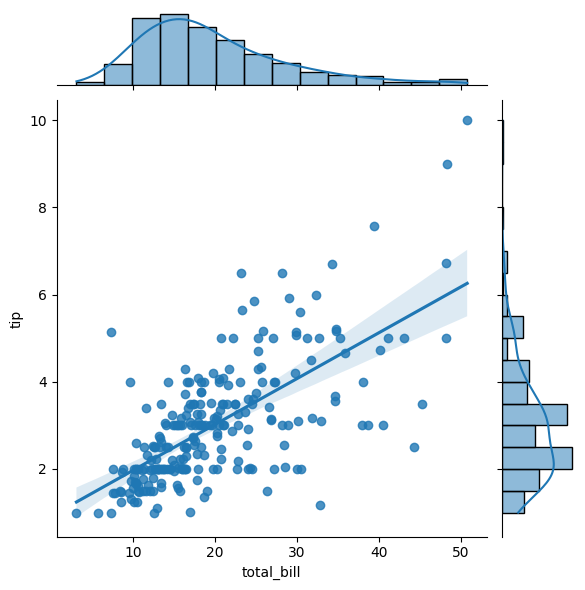

In [88]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')  # scatter plot with regression line between total_bill and tip

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

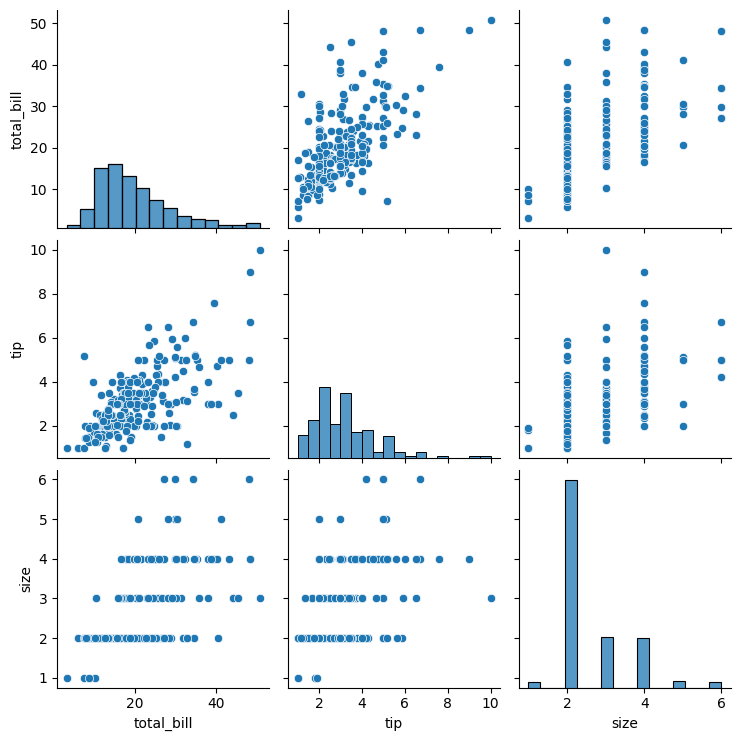

In [89]:
sns.pairplot(tips)   # pairwise scatter plots and distributions for all numeric columns

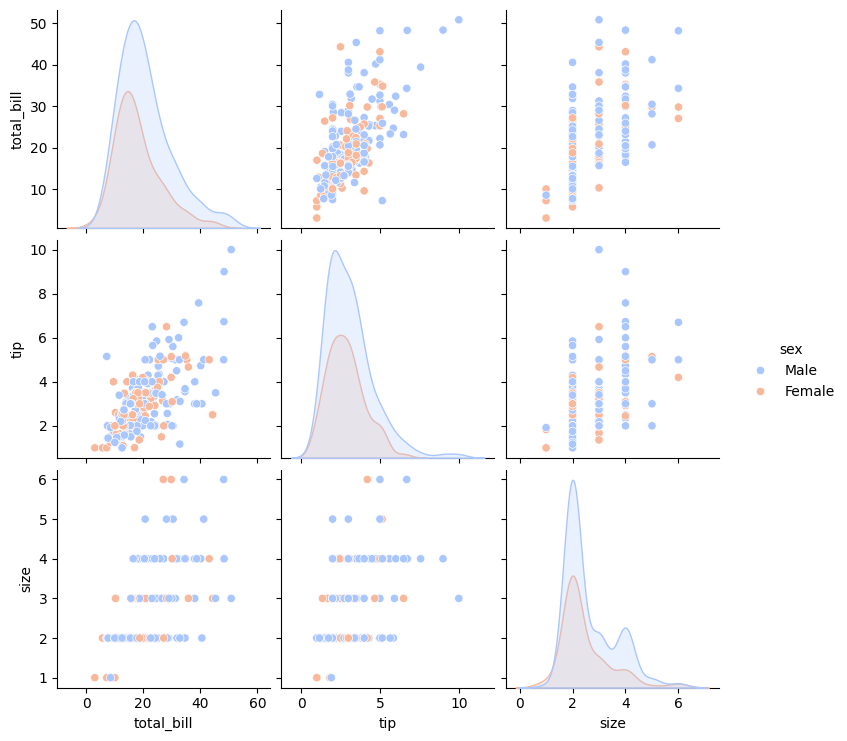

In [90]:
sns.pairplot(tips, hue='sex', palette='coolwarm')  # pairwise plots colored by sex using coolwarm palette

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

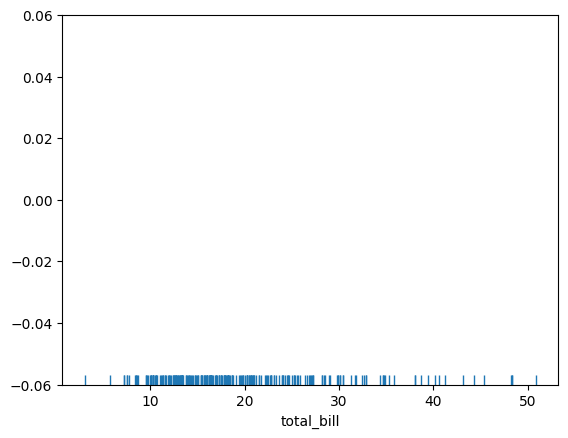

In [91]:
sns.rugplot(tips['total_bill'])   # draw small tick marks for each total_bill value on the axis

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

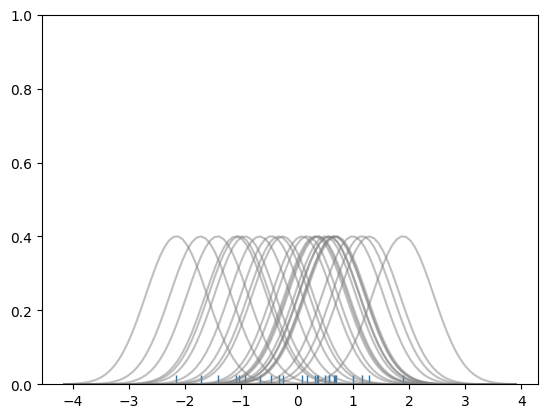

In [92]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:

    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

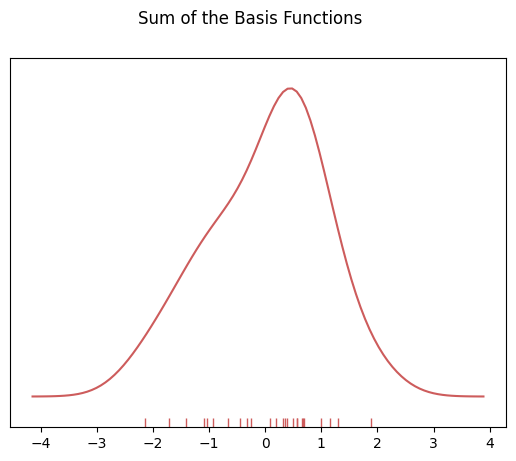

In [93]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

<Axes: xlabel='total_bill', ylabel='Density'>

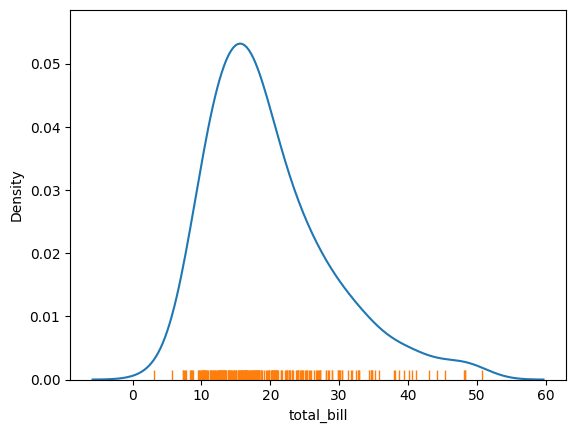

In [94]:
sns.kdeplot(tips['total_bill'])   # KDE curve showing distribution of total_bill
sns.rugplot(tips['total_bill'])   # add tick marks for each value

<Axes: xlabel='tip', ylabel='Density'>

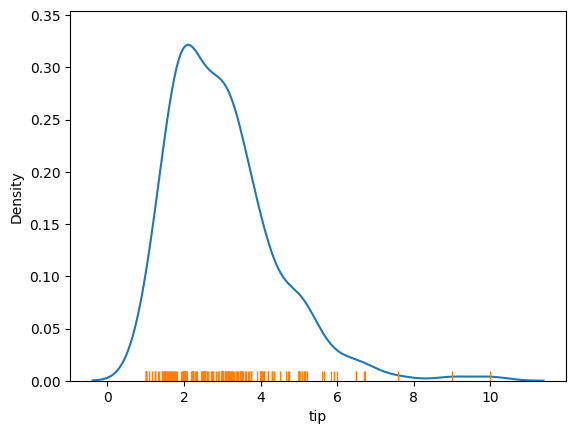

In [95]:
sns.kdeplot(tips['tip'])   # KDE curve showing distribution of tip
sns.rugplot(tips['tip'])   # add tick marks for each value

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [96]:
import seaborn as sns   # import seaborn plotting library
%matplotlib inline

In [97]:
tips = sns.load_dataset('tips')   # load the sample tips dataset
tips.head()                       # show first 5 rows


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

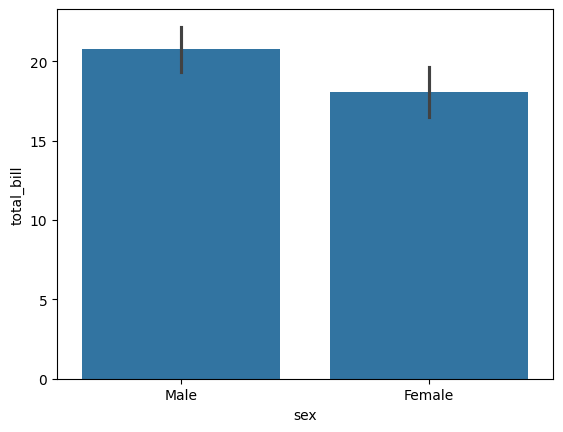

In [98]:
sns.barplot(x='sex', y='total_bill', data=tips)  # bar chart showing average total_bill for each sex

In [99]:
import numpy as np   # import NumPy library for numerical operations

You can change the estimator object to your own function, that converts a vector to a scalar:

<Axes: xlabel='sex', ylabel='total_bill'>

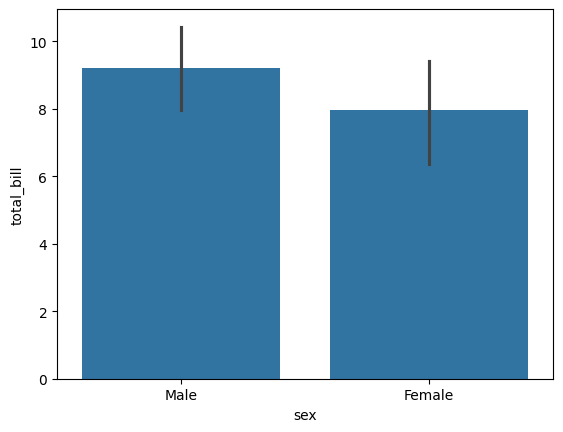

In [100]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)  # bar chart showing std deviation of total_bill per sex

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<Axes: xlabel='sex', ylabel='count'>

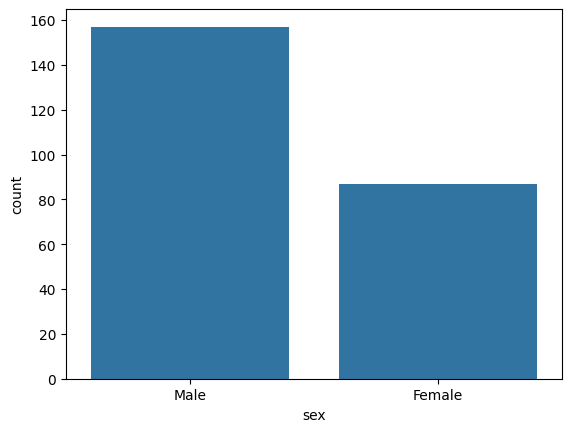

In [101]:
sns.countplot(x='sex', data=tips)  # bar chart showing count of each sex category

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

/tmp/ipython-input-1092645285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')  # boxplot of total_bill distribution for each day


<Axes: xlabel='day', ylabel='total_bill'>

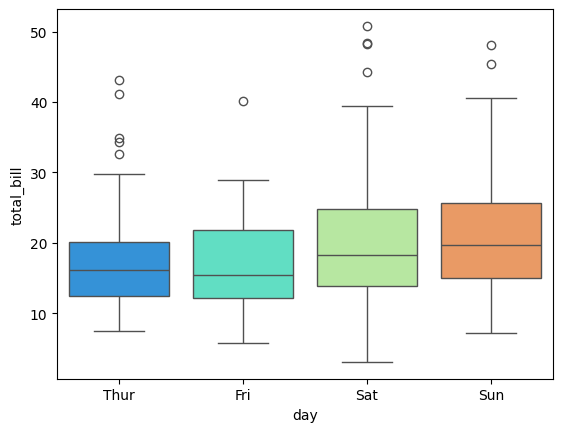

In [102]:
sns.boxplot(x="day", y="total_bill", data=tips, palette='rainbow')  # boxplot of total_bill distribution for each day

<Axes: >

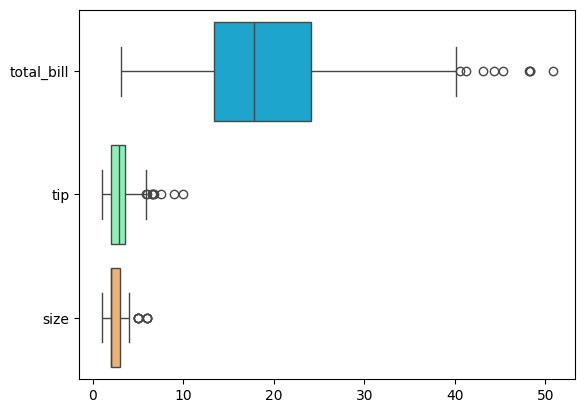

In [103]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

<Axes: xlabel='day', ylabel='total_bill'>

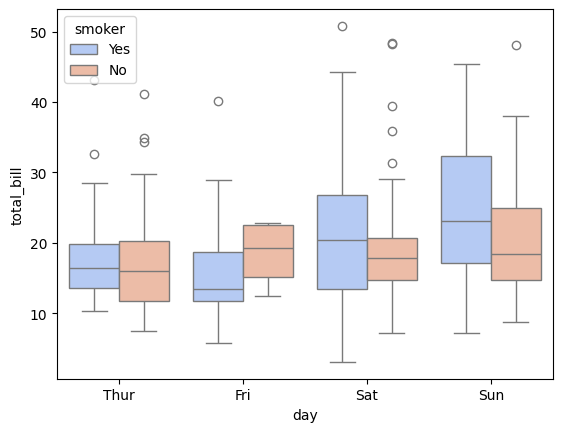

In [104]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="coolwarm")  # boxplot by day, split by smoker status

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

/tmp/ipython-input-2488651617.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')  # violin plot of total_bill distribution for each day


<Axes: xlabel='day', ylabel='total_bill'>

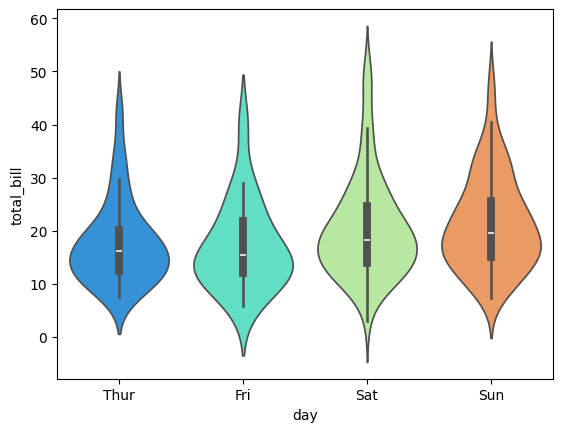

In [105]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')  # violin plot of total_bill distribution for each day

<Axes: xlabel='day', ylabel='total_bill'>

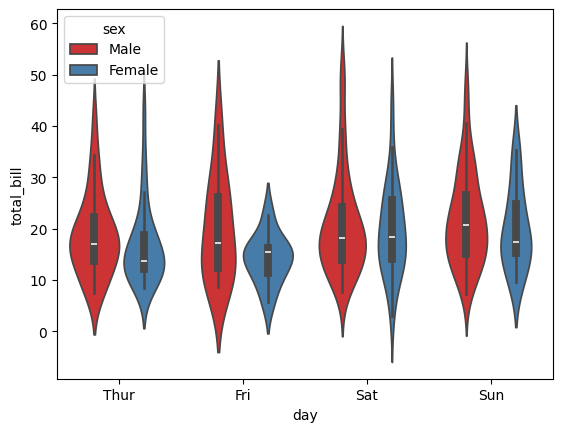

In [106]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1')  # violin plot by day, colored by sex

<Axes: xlabel='day', ylabel='total_bill'>

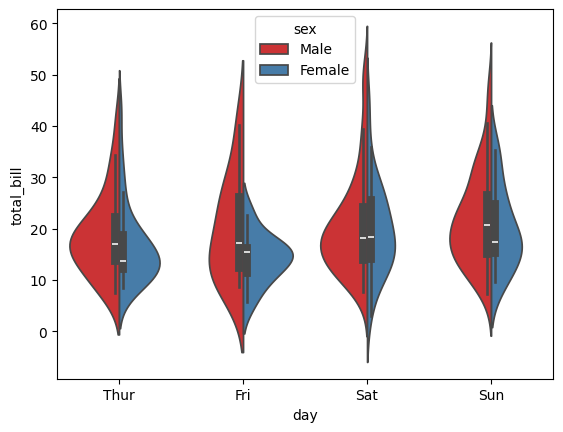

In [107]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set1')  # split violin plot by sex for each day

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

/tmp/ipython-input-1752612735.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow')  # scatter points of total_bill for each day


<Axes: xlabel='day', ylabel='total_bill'>

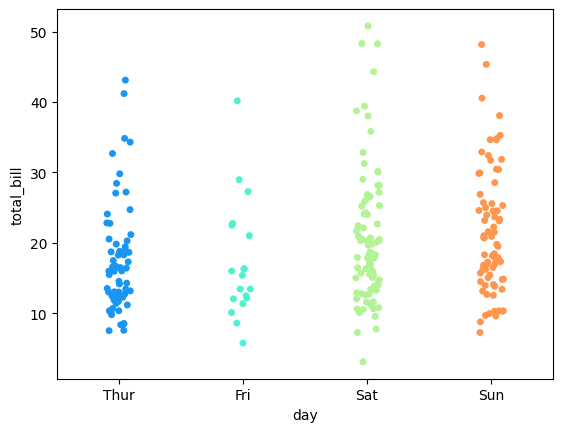

In [108]:
sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow')  # scatter points of total_bill for each day

/tmp/ipython-input-1017276763.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, palette='rainbow')  # scatter points with jitter to avoid overlap


<Axes: xlabel='day', ylabel='total_bill'>

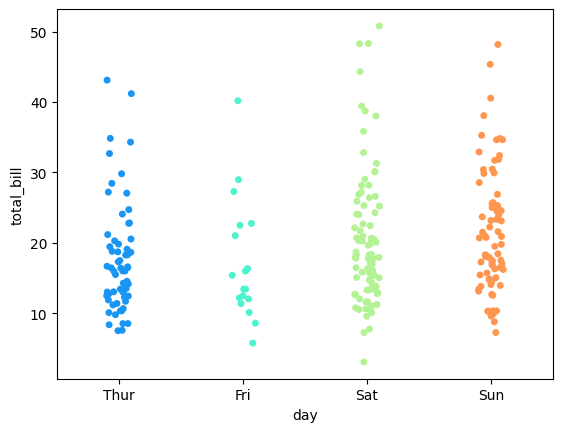

In [109]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, palette='rainbow')  # scatter points with jitter to avoid overlap

<Axes: xlabel='day', ylabel='total_bill'>

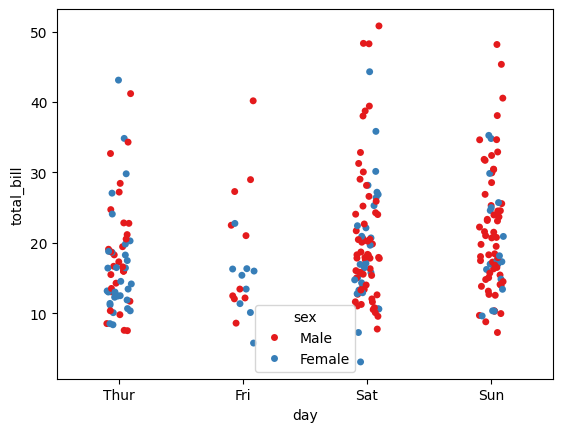

In [110]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1')  # scatter points with jitter, colored by sex

<Axes: xlabel='day', ylabel='total_bill'>

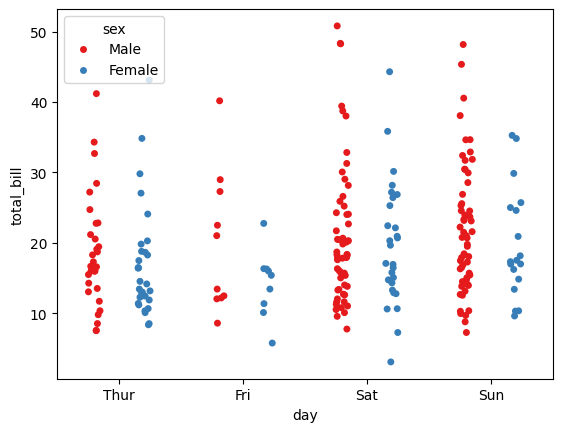

In [111]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1', dodge=True)  # scatter with jitter, colored by sex, separated side-by-side

<Axes: xlabel='day', ylabel='total_bill'>

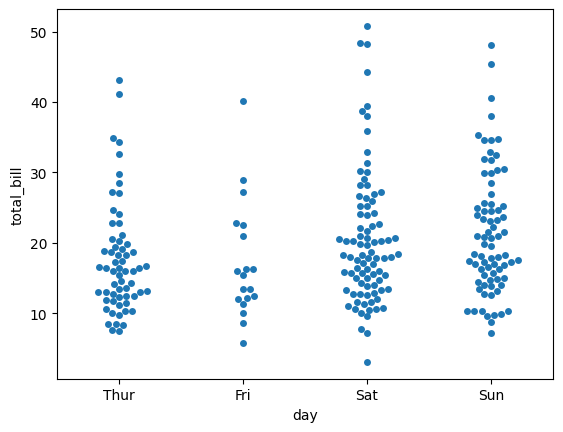

In [112]:
sns.swarmplot(x="day", y="total_bill", data=tips)  # categorical scatter plot with non-overlapping points

### Combining Categorical Plots

/tmp/ipython-input-1187185544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')      # violin plot of tip distribution for each day


<Axes: xlabel='tip', ylabel='day'>

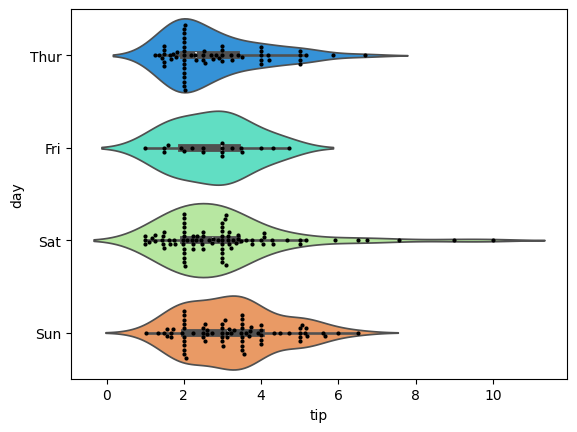

In [113]:
sns.violinplot(x="tip", y="day", data=tips, palette='rainbow')      # violin plot of tip distribution for each day
sns.swarmplot(x="tip", y="day", data=tips, color='black', size=3)    # overlay individual points on top

## catplot

factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

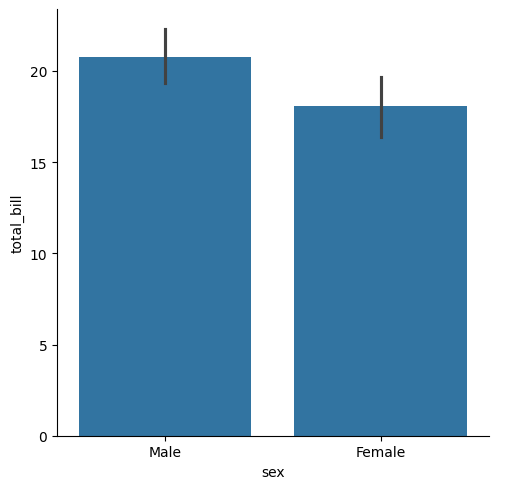

In [114]:
sns.catplot(x='sex', y='total_bill', data=tips, kind='bar')  # categorical bar plot showing average total_bill per sex

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [115]:
import seaborn as sns   # import seaborn plotting library
%matplotlib inline

In [116]:
flights = sns.load_dataset('flights')   # load the built-in flights dataset

In [117]:
tips = sns.load_dataset('tips')   # load the built-in tips dataset

In [118]:
tips.head()   # show first 5 rows of the dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [119]:
flights.head()   # show first 5 rows of the flights dataset

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [120]:
tips.head()   # show first 5 rows of the tips dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [123]:
# correlation only for numeric columns
tips.corr(numeric_only=True)


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

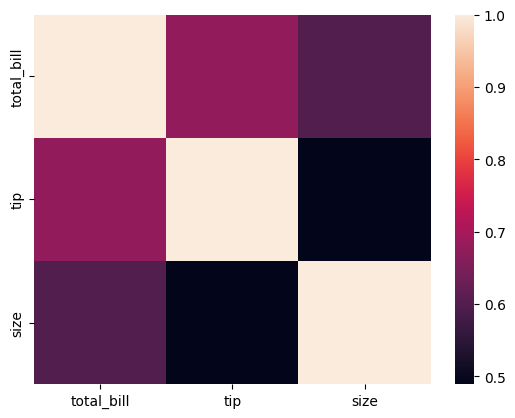

In [125]:
sns.heatmap(tips.corr(numeric_only=True))  # heatmap for numeric columns only


<Axes: >

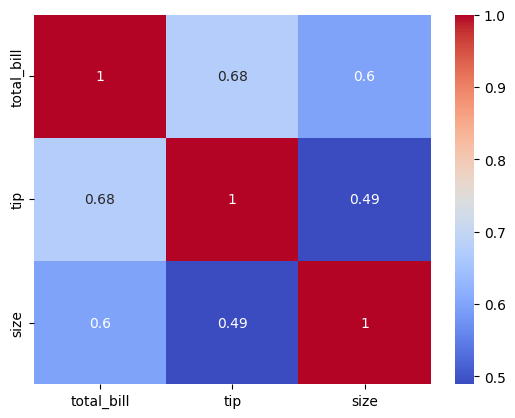

In [127]:
sns.heatmap(tips.corr(numeric_only=True), cmap='coolwarm', annot=True)  # heatmap of numeric correlations with values shown


Or for the flights data:

In [128]:
flights.pivot_table(values='passengers', index='month', columns='year')  # create matrix of passengers by month (rows) and year (columns)

/tmp/ipython-input-2348980142.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers', index='month', columns='year')  # create matrix of passengers by month (rows) and year (columns)


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


/tmp/ipython-input-1041252461.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvflights = flights.pivot_table(values='passengers', index='month', columns='year')  # create pivot table of passengers


<Axes: xlabel='year', ylabel='month'>

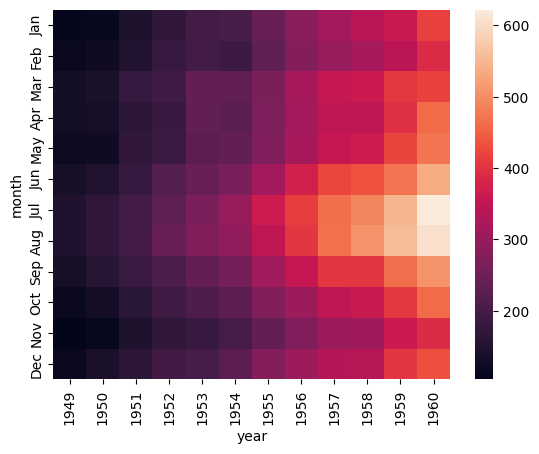

In [129]:
pvflights = flights.pivot_table(values='passengers', index='month', columns='year')  # create pivot table of passengers
sns.heatmap(pvflights)  # draw heatmap of the pivot table

<Axes: xlabel='year', ylabel='month'>

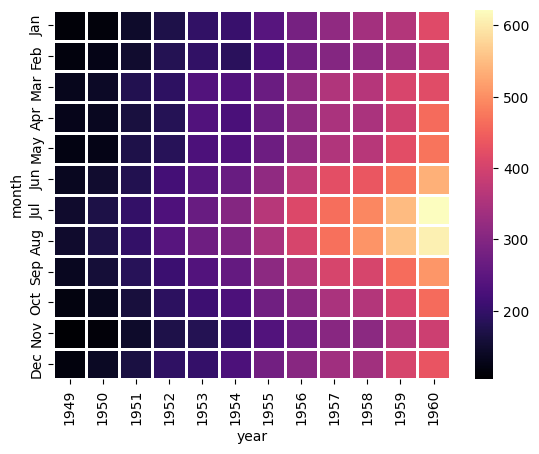

In [130]:
sns.heatmap(pvflights, cmap='magma', linecolor='white', linewidths=1)  # heatmap with magma colors and white grid lines

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

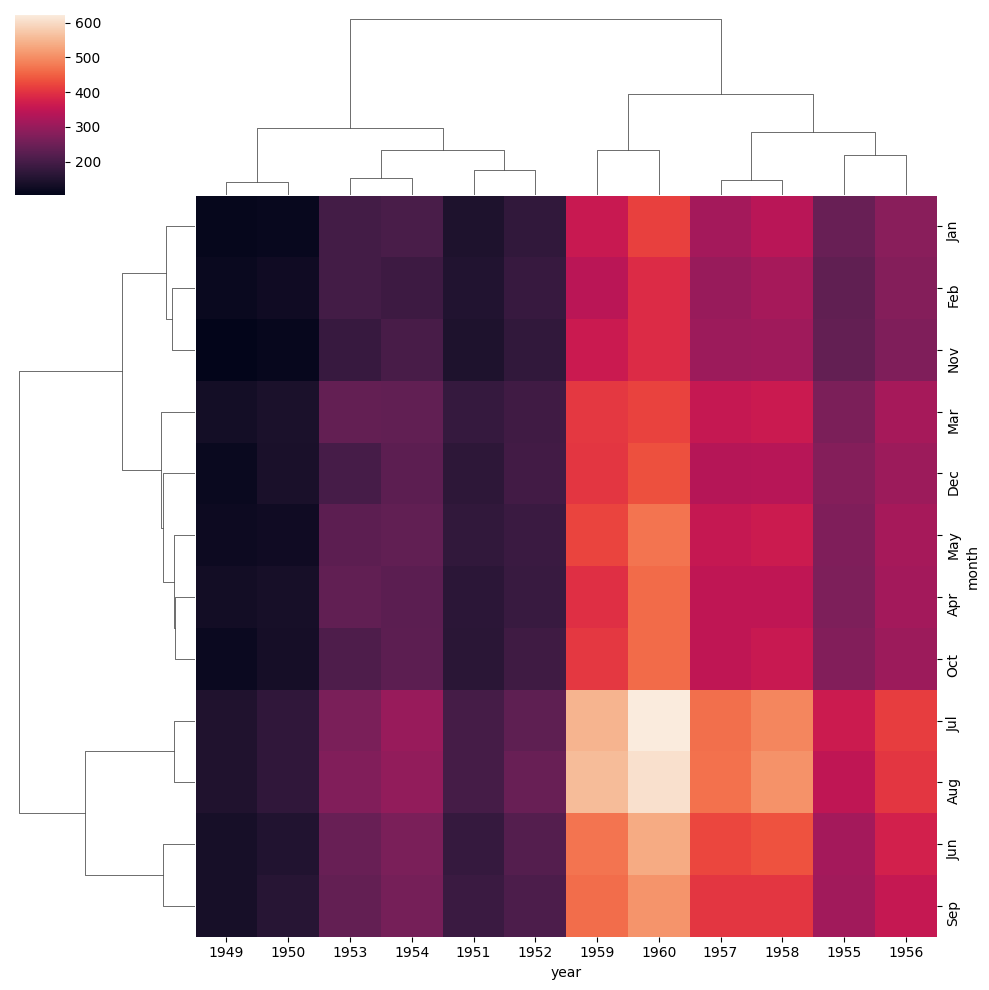

In [131]:
sns.clustermap(pvflights)  # clustered heatmap grouping rows and columns by similarity

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

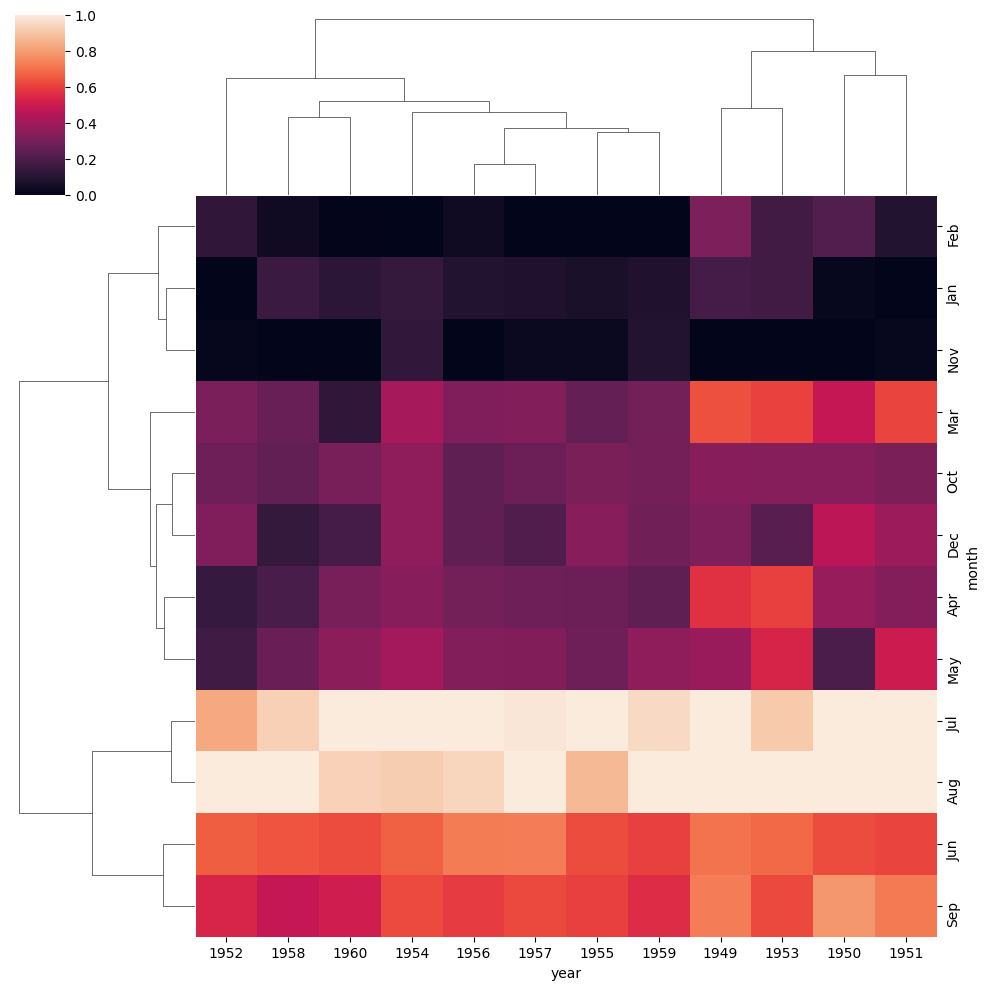

In [132]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,standard_scale=1)

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [134]:
import seaborn as sns   # import seaborn plotting library
%matplotlib inline

In [135]:
tips = sns.load_dataset('tips')   # load the built-in tips dataset

In [136]:
tips.head()   # show first 5 rows of the tips dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

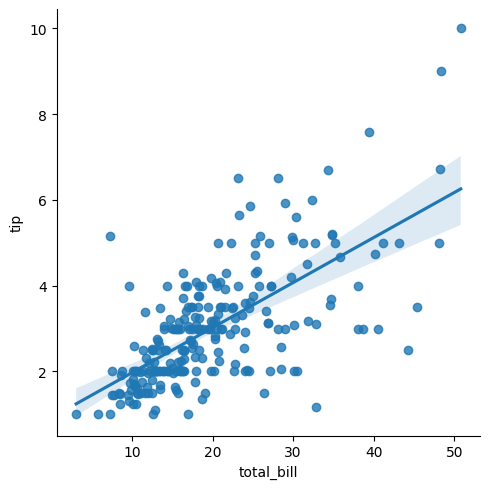

In [137]:
sns.lmplot(x='total_bill', y='tip', data=tips)  # scatter plot with linear regression line

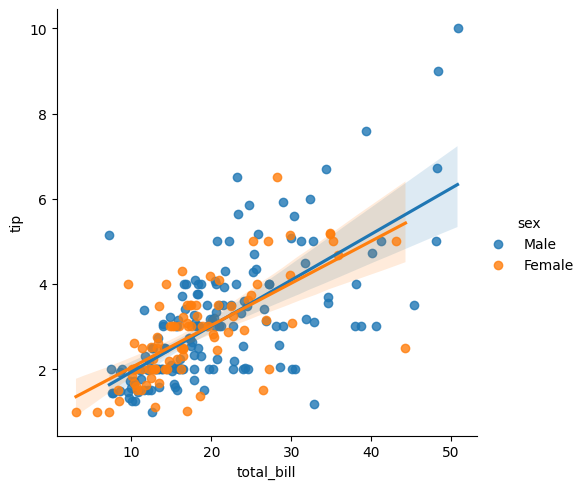

In [138]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')  # regression plot colored by sex

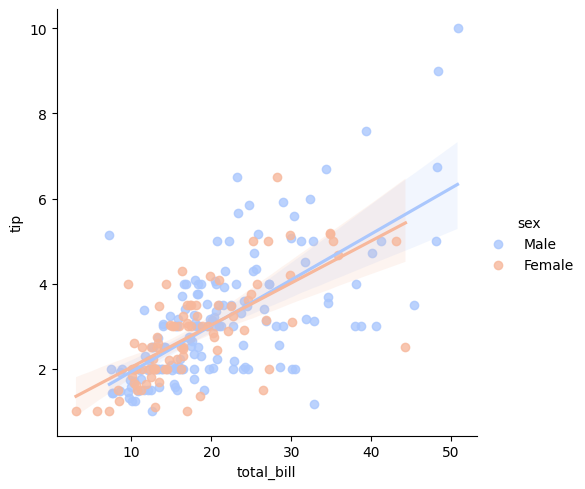

In [139]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='coolwarm')  # regression plot colored by sex with coolwarm palette

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

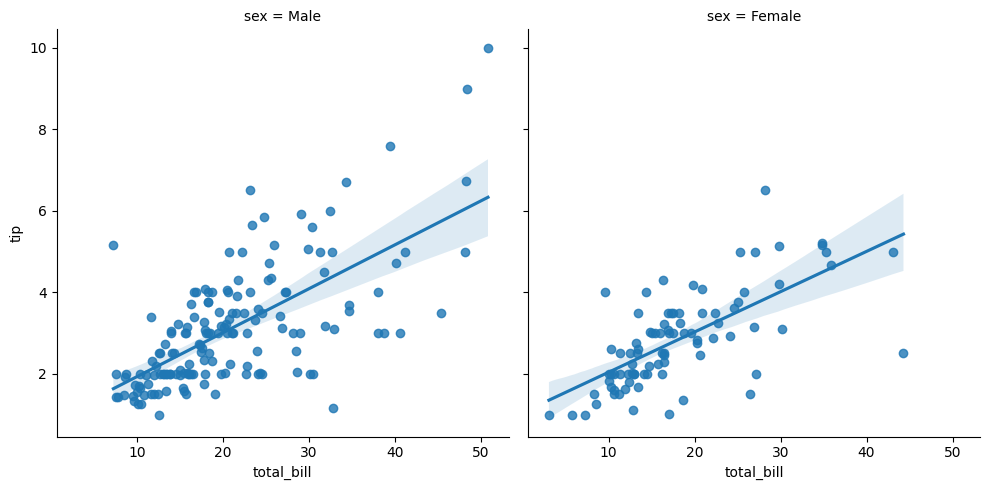

In [140]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')  # separate regression plots in columns by sex

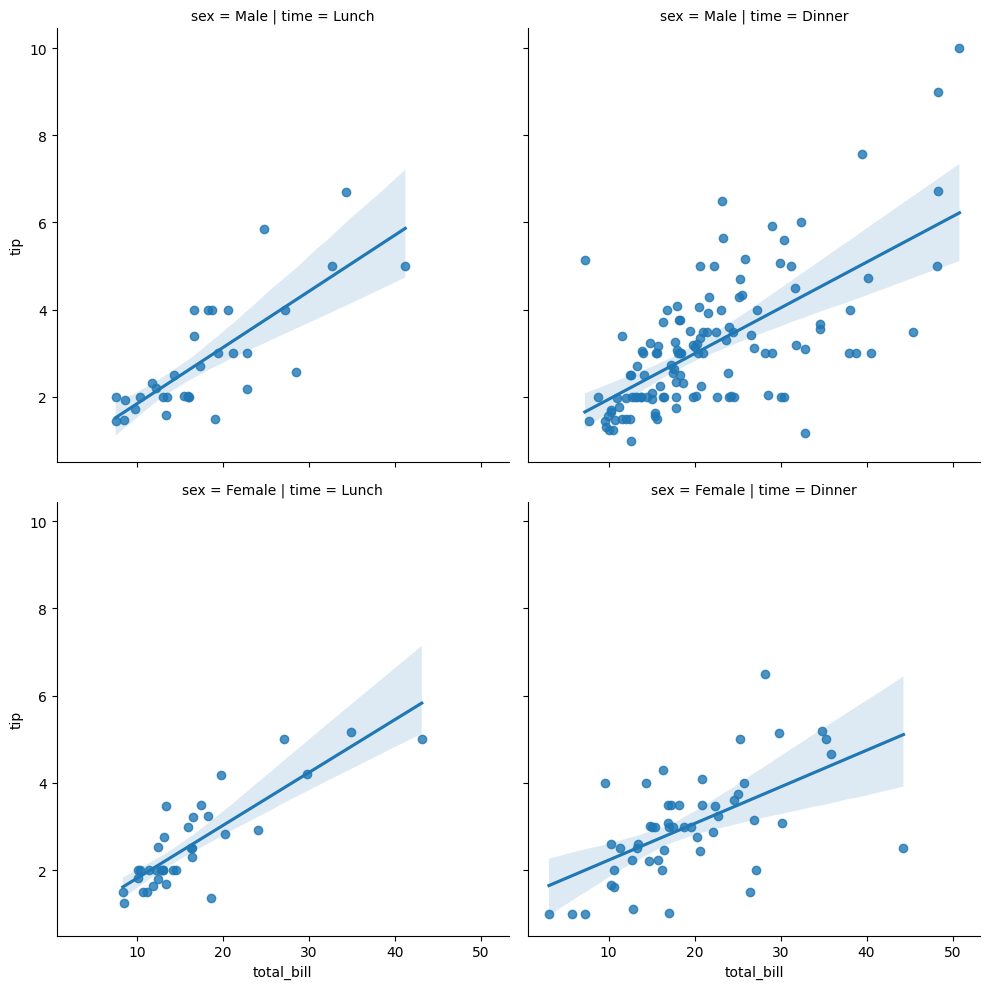

In [141]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips)  # grid of regression plots split by sex (rows) and time (columns)

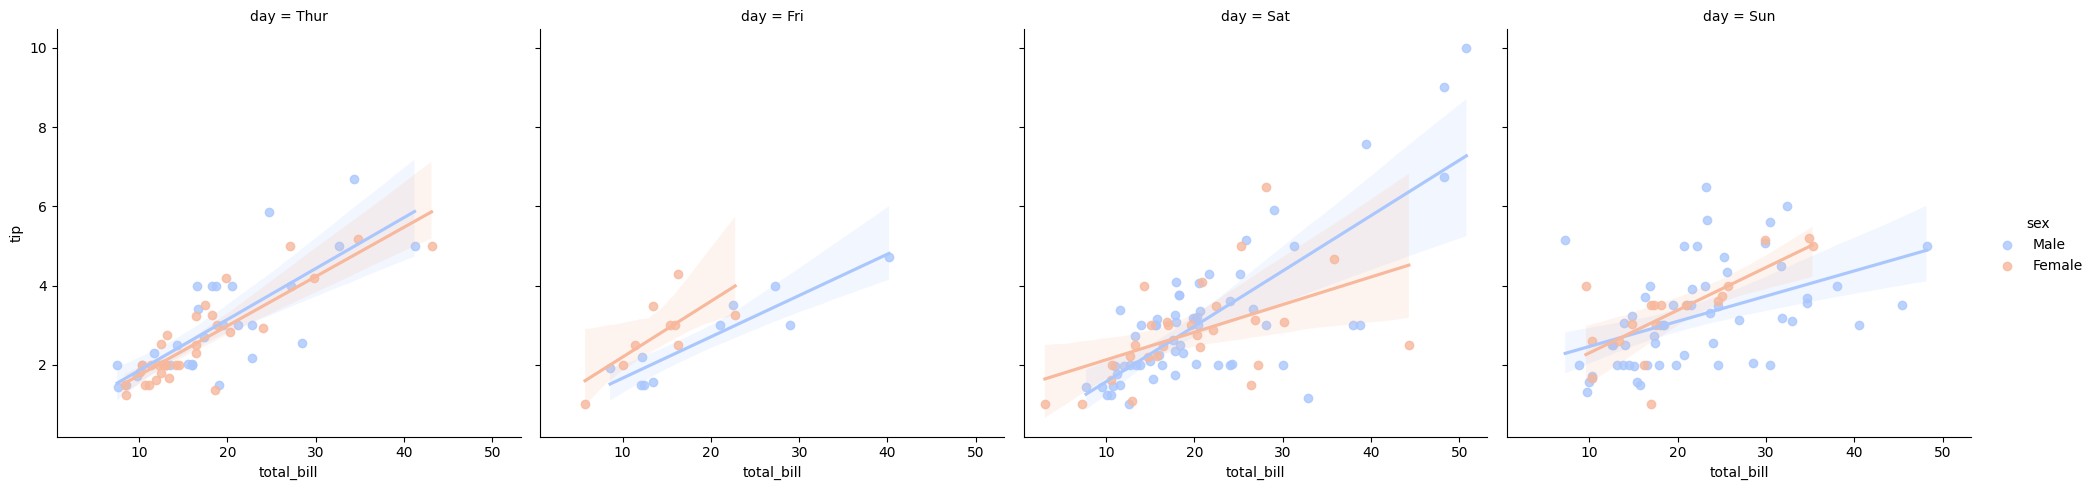

In [142]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', palette='coolwarm')  # regression plots by day, colored by sex

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

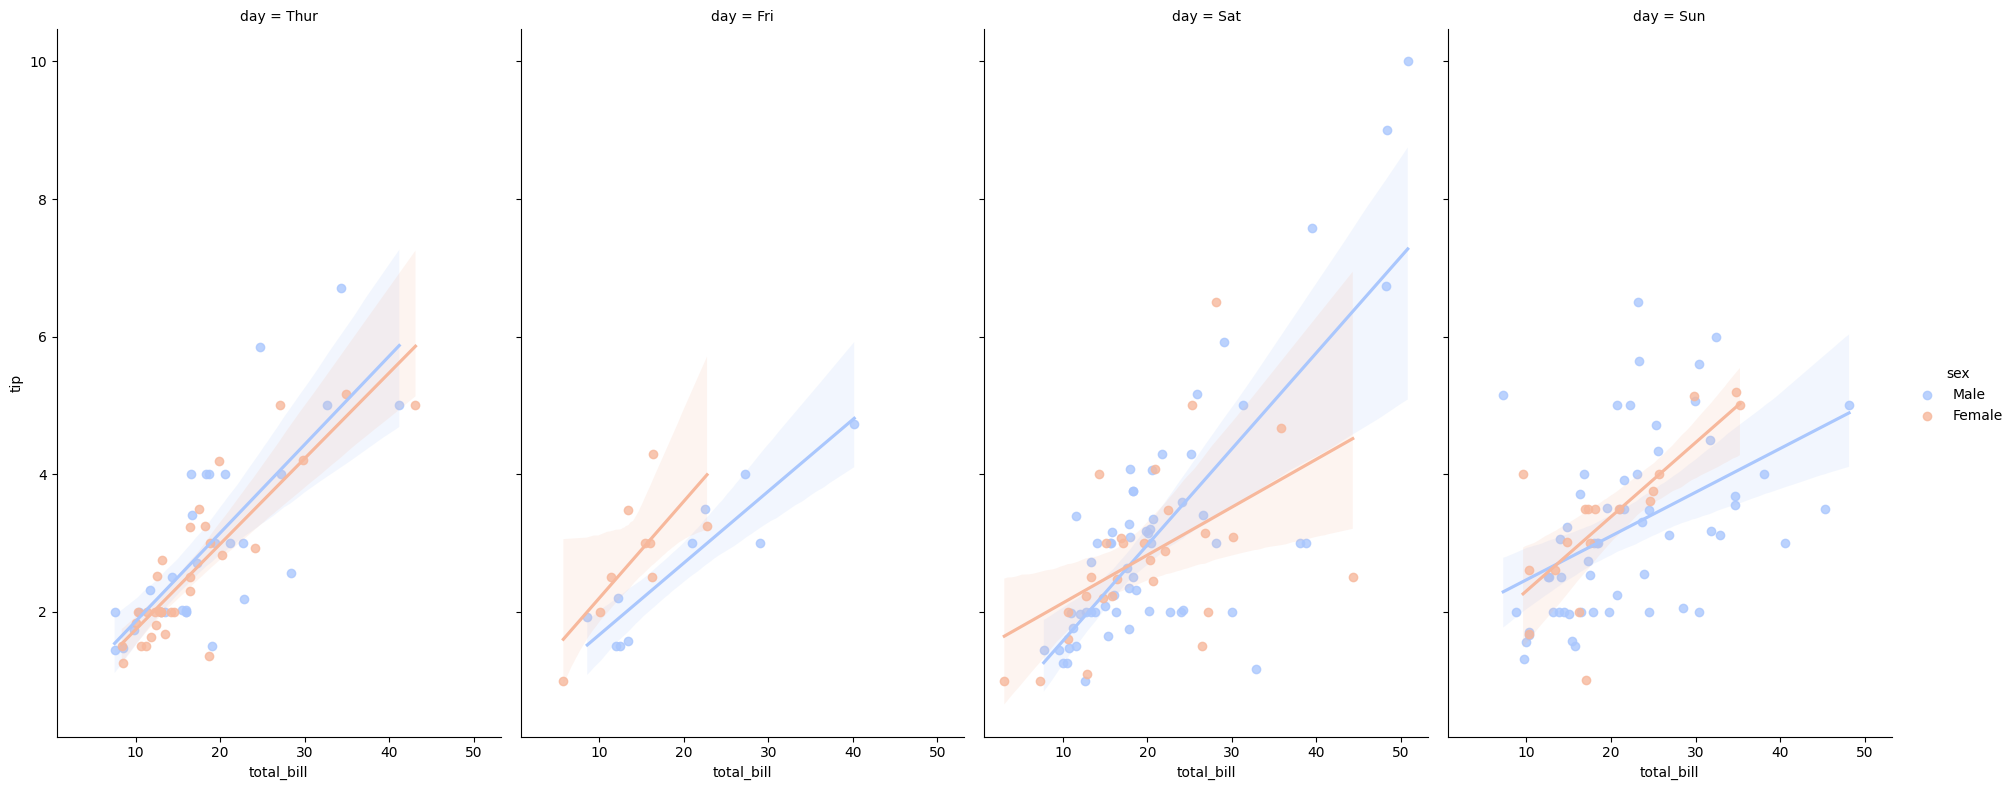

In [143]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', palette='coolwarm',
           aspect=0.6, height=8)  # regression plots by day, colored by sex, with custom size/aspect

### Reference:

* https://seaborn.pydata.org/ - Seaborn: statistical data visualization


* https://seaborn.pydata.org/tutorial/color_palettes.html - Color palettes